# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [263]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [264]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [265]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
i=1
j=0
k = int(len(cities)/50) + 1
print(k)
weather=[]

print("Beginning Data Retrieval")
print("-------------------------")
for city in cities:
    if (j==50):
        j=0
        i=i+1
        
        
    print(f"Processing Record {j} of Set {i} | {city} ")
    j=j+1
    
    query_url = f"{base_url}appid={weather_api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if (weather_json["cod"]=="404"):
        print("City not found. Skipping...")
    else:
        weather.append(weather_json)     
       

print("---------------------------")    
print("Data Retrieval Complete")


13
Beginning Data Retrieval
-------------------------
Processing Record 0 of Set 1 | takoradi 
Processing Record 1 of Set 1 | new norfolk 
Processing Record 2 of Set 1 | monte alegre 
Processing Record 3 of Set 1 | airai 
Processing Record 4 of Set 1 | seguin 
Processing Record 5 of Set 1 | castro 
Processing Record 6 of Set 1 | te anau 
Processing Record 7 of Set 1 | cape town 
Processing Record 8 of Set 1 | carauari 
Processing Record 9 of Set 1 | kurlovo 
Processing Record 10 of Set 1 | saskylakh 
Processing Record 11 of Set 1 | carnarvon 
Processing Record 12 of Set 1 | port alfred 
Processing Record 13 of Set 1 | ushuaia 
Processing Record 14 of Set 1 | busselton 
Processing Record 15 of Set 1 | revelstoke 
Processing Record 16 of Set 1 | vardo 
Processing Record 17 of Set 1 | vaini 
Processing Record 18 of Set 1 | rikitea 
Processing Record 19 of Set 1 | bekhtery 
Processing Record 20 of Set 1 | manoel urbano 
Processing Record 21 of Set 1 | mataura 
Processing Record 22 of Set 1

Processing Record 28 of Set 4 | nueva loja 
Processing Record 29 of Set 4 | bengkulu 
City not found. Skipping...
Processing Record 30 of Set 4 | mezen 
Processing Record 31 of Set 4 | komsomolskiy 
Processing Record 32 of Set 4 | toamasina 
Processing Record 33 of Set 4 | gondanglegi 
Processing Record 34 of Set 4 | viedma 
Processing Record 35 of Set 4 | suntar 
Processing Record 36 of Set 4 | makakilo city 
Processing Record 37 of Set 4 | geraldton 
Processing Record 38 of Set 4 | puerto escondido 
Processing Record 39 of Set 4 | souillac 
Processing Record 40 of Set 4 | grand gaube 
Processing Record 41 of Set 4 | galesong 
Processing Record 42 of Set 4 | gushikawa 
Processing Record 43 of Set 4 | beloha 
Processing Record 44 of Set 4 | teknaf 
Processing Record 45 of Set 4 | bougouni 
Processing Record 46 of Set 4 | bandarbeyla 
Processing Record 47 of Set 4 | darnah 
Processing Record 48 of Set 4 | sola 
Processing Record 49 of Set 4 | conceicao da barra 
Processing Record 0 of S

Processing Record 10 of Set 8 | fortuna 
Processing Record 11 of Set 8 | tateyama 
Processing Record 12 of Set 8 | teguldet 
Processing Record 13 of Set 8 | kununurra 
Processing Record 14 of Set 8 | puerto carreno 
Processing Record 15 of Set 8 | yambio 
City not found. Skipping...
Processing Record 16 of Set 8 | tuatapere 
Processing Record 17 of Set 8 | saint-augustin 
Processing Record 18 of Set 8 | richards bay 
Processing Record 19 of Set 8 | marquette 
Processing Record 20 of Set 8 | kamenka 
Processing Record 21 of Set 8 | narsaq 
Processing Record 22 of Set 8 | taltal 
Processing Record 23 of Set 8 | santa maria 
Processing Record 24 of Set 8 | faanui 
Processing Record 25 of Set 8 | piacabucu 
Processing Record 26 of Set 8 | sumbe 
Processing Record 27 of Set 8 | vila franca do campo 
Processing Record 28 of Set 8 | hambantota 
Processing Record 29 of Set 8 | bonavista 
Processing Record 30 of Set 8 | lavrentiya 
Processing Record 31 of Set 8 | tokmak 
Processing Record 32 of

Processing Record 45 of Set 11 | deputatskiy 
Processing Record 46 of Set 11 | chernyshevskiy 
Processing Record 47 of Set 11 | ambodifototra 
City not found. Skipping...
Processing Record 48 of Set 11 | itarema 
Processing Record 49 of Set 11 | saint-francois 
Processing Record 0 of Set 12 | magoula 
Processing Record 1 of Set 12 | cayambe 
Processing Record 2 of Set 12 | port lincoln 
Processing Record 3 of Set 12 | praia 
Processing Record 4 of Set 12 | khandyga 
Processing Record 5 of Set 12 | garoua boulai 
Processing Record 6 of Set 12 | martil 
Processing Record 7 of Set 12 | aflu 
City not found. Skipping...
Processing Record 8 of Set 12 | tura 
Processing Record 9 of Set 12 | surt 
Processing Record 10 of Set 12 | peniche 
Processing Record 11 of Set 12 | kaele 
Processing Record 12 of Set 12 | constitucion 
Processing Record 13 of Set 12 | ambulu 
Processing Record 14 of Set 12 | tokyo 
Processing Record 15 of Set 12 | jardim 
Processing Record 16 of Set 12 | peterhead 
Proce

In [266]:

print (len(weather))

564


In [284]:

pprint(weather[0])

{'base': 'model',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 4.89, 'lon': -1.75},
 'dt': 1578261797,
 'id': 2294915,
 'main': {'feels_like': 80.85,
          'grnd_level': 1011,
          'humidity': 58,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 79.75,
          'temp_max': 79.75,
          'temp_min': 79.75},
 'name': 'Takoradi',
 'sys': {'country': 'GH', 'sunrise': 1578204990, 'sunset': 1578247641},
 'timezone': 0,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 178, 'speed': 6.42}}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [287]:
 
name = weather[0]["name"]
country = weather[0]["sys"]["country"]
date= weather[0]["dt"]
lat = weather[0]["coord"]["lat"]
lng = weather[0]["coord"]["lon"]
temp = weather[0]["main"]["temp_max"]
hum = weather[0]["main"]["humidity"]
cloud = weather[0]["clouds"]["all"]
wind = weather[0]["wind"]["speed"]
    
    
    
cities_weather_beg=pd.DataFrame({
        
        "city name": name,
        "country":country,
        "date": date,
        "latitude": lat,
        "longitude":lng,
        "max temperature": temp,
        "humidity": hum,
        "cloudiness": cloud,
        "wind speed": [wind]
    })



for i in range(1, len(weather)):
 
    name = weather[i]["name"]
    country = weather[i]["sys"]["country"]
    date= weather[i]["dt"]
    lat = weather[i]["coord"]["lat"]
    lng = weather[i]["coord"]["lon"]
    temp = weather[i]["main"]["temp_max"]
    hum = weather[i]["main"]["humidity"]
    cloud = weather[i]["clouds"]["all"]
    wind = weather[i]["wind"]["speed"]
    
    
    
    cities_weather=pd.DataFrame({
        
        "city name": name,
        "country":country,
        "date":date,
        "latitude": lat,
        "longitude":lng,
        "max temperature": temp,
        "humidity": hum,
        "cloudiness": cloud,
        "wind speed": [wind]
    })
    
    cities_weather = pd.concat([cities_weather_beg, cities_weather], axis=0, ignore_index=True)
    cities_weather_beg = cities_weather
    
    
    
#cities_weather = cities_weather.reset_index(drop=True)   
cities_weather.to_csv("../weatherPy/output_data/cities.csv", index=True)
cities_weather.head()



,city name,country,date,latitude,longitude,max temperature,humidity,cloudiness,wind speed
0,Takoradi,GH,1578261797,4.89,-1.75,79.75,58,5,6.42
1,New Norfolk,AU,1578261797,-42.78,147.06,62.01,58,20,3.36
2,Monte Alegre,BR,1578261797,-2.00,-54.07,85.89,62,80,2.55
3,Airai,TL,1578261797,-8.93,125.41,69.42,84,100,5.26
4,Seguin,US,1578261797,29.57,-97.96,75.99,22,1,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

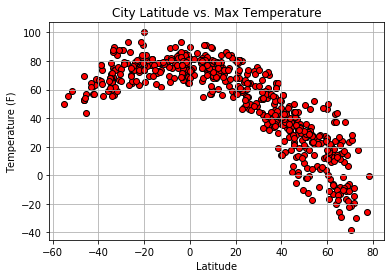

In [268]:
plt.scatter(cities_weather["latitude"], cities_weather["max temperature"], marker='o', facecolor="red", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig('output_data/City Latitude vs. Max Temperature.png')
plt.show()


In [ ]:
#As you get further from the equator in latitude, the temperature decreases. 
#Aso, The Northern Hemisphere is colder than the Southern Hemisphere, so it is winter in the Northern Hemisphere and summer in the Southern

#### Latitude vs. Humidity Plot

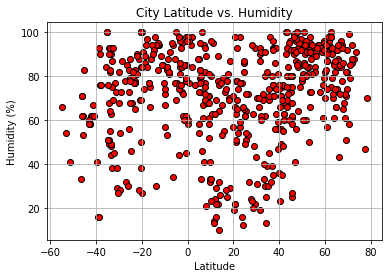

In [269]:
plt.scatter(cities_weather["latitude"], cities_weather["humidity"], marker='o', facecolor="red", edgecolor = "black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('output_data/City Latitude vs. Humidity.png')
plt.show()

In [ ]:
#There is no relationship between latitude and humidity.

#### Latitude vs. Cloudiness Plot

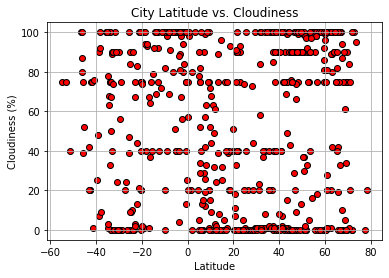

In [270]:
plt.scatter(cities_weather["latitude"], cities_weather["cloudiness"], marker='o', facecolor="red", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('output_data/City Latitude vs. Cloudiness.png')
plt.show()

In [ ]:
#There is no relationship between latitude and cloudiness.

#### Latitude vs. Wind Speed Plot

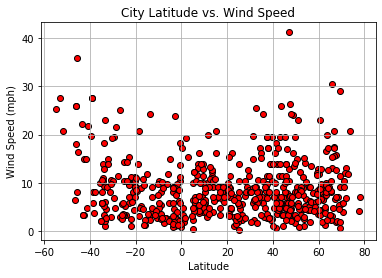

In [271]:
plt.scatter(cities_weather["latitude"], cities_weather["wind speed"], marker='o', facecolor="red", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('output_data/City Latitude vs. Wind Speed.png')
plt.show()

In [ ]:
#Strong wind is rare, and wind speed mostly ranges from 0 to 15 mph.

## Linear Regression

In [272]:
# OPTIONAL: Create a function to create Linear Regression plots
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)
     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    correlation = np.corrcoef(x, y)[0,1]

     # r
    results['correlation'] = correlation
     # r-squared
    results['determination'] = correlation**2

    return results['determination']

def linear_regression(x,y,subtitle, xlabel, ylabel):
   
    (slope, intercept, _, _, _) = linregress(x, y)
    fit = slope * x + intercept

    fig, ax = plt.subplots()
    
    fig.suptitle(subtitle, fontsize=12, fontweight="bold")
    r2=polyfit(x,y,1)
    print(f"The r-squared is: {r2}")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.plot(x, y, linewidth=0, marker='o')
    ax.plot(x, fit, 'r--')

    plt.grid()
    
    if (os.path.exists("output_data")==False):
        os.mkdir('output_data')
    plt.savefig('output_data/'+subtitle+'.png')
    
    plt.show() 
    

In [273]:
# Create Northern and Southern Hemisphere DataFrames
northen_hem = cities_weather.loc[cities_weather["latitude"]>=0, :]
northen_hem.reset_index(drop=True)

southern_hem = cities_weather.loc[cities_weather["latitude"]<0, :]
southern_hem.reset_index(drop=True)

,city name,country,date,latitude,max temperature,humidity,cloudiness,wind speed
0,New Norfolk,AU,1578261797,-42.78,62.01,58,20,3.36
1,Monte Alegre,BR,1578261797,-2.00,85.89,62,80,2.55
2,Airai,TL,1578261797,-8.93,69.42,84,100,5.26
3,Castro,CL,1578261797,-42.48,57.20,62,75,14.99
4,Te Anau,NZ,1578261798,-45.41,43.75,83,52,16.42
...,...,...,...,...,...,...,...,...
168,Ahipara,NZ,1578261850,-35.17,66.00,100,100,1.99
169,Payo,ID,1578261850,-3.75,68.86,98,100,1.43
170,Margate,AU,1578261850,-43.03,62.01,58,20,3.36
171,Lekoni,GA,1578261850,-1.58,79.03,60,84,1.25


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7725986722501563


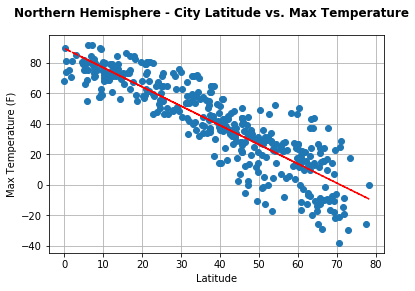

In [274]:

linear_regression(northen_hem["latitude"],northen_hem["max temperature"],
                  "Northern Hemisphere - City Latitude vs. Max Temperature", "Latitude", "Max Temperature (F)")


In [ ]:
#There is strong negative correlation berween max temperature and latitude in the Northern Hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.28824214134989884


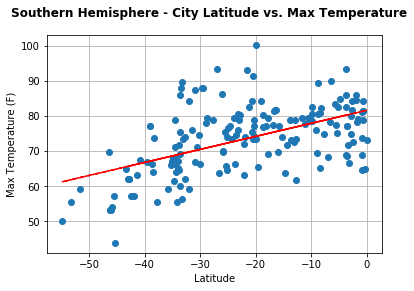

In [275]:

linear_regression(southern_hem["latitude"],southern_hem["max temperature"],
                 "Southern Hemisphere - City Latitude vs. Max Temperature", "Latitude", "Max Temperature (F)" )


In [ ]:
#There is weak positive correlation berween max temperature and latitude in the Southern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14131318815705118


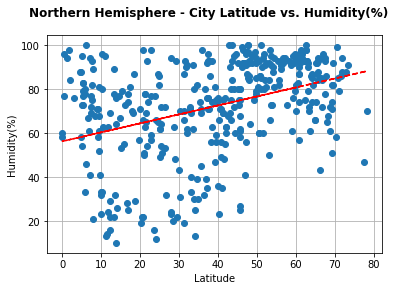

In [276]:

linear_regression(northen_hem["latitude"],northen_hem["humidity"],
                 "Northern Hemisphere - City Latitude vs. Humidity(%)","Latitude", "Humidity(%)")


In [ ]:
#There almost no correlation between latitude and humidity in the Nothern Hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12805592183683331


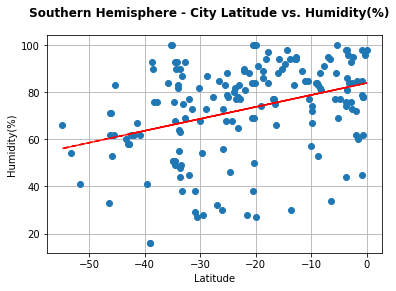

In [277]:
linear_regression(southern_hem["latitude"],southern_hem["humidity"],
                 "Southern Hemisphere - City Latitude vs. Humidity(%)","Latitude", "Humidity(%)")

In [ ]:
#There little correlation between latitude and humidity in the Southern Hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.061795617710869014


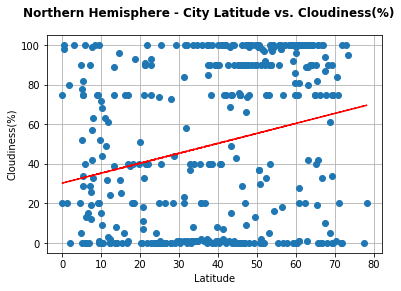

In [278]:
linear_regression(northen_hem["latitude"],northen_hem["cloudiness"],
                 "Northern Hemisphere - City Latitude vs. Cloudiness(%)","Latitude", "Cloudiness(%)")

In [ ]:
#There is no correlation between latitude and cloudiness in the Northern Hemisphere.
#Cloudiness is mostly either close to 0% or 100%.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04781920961726912


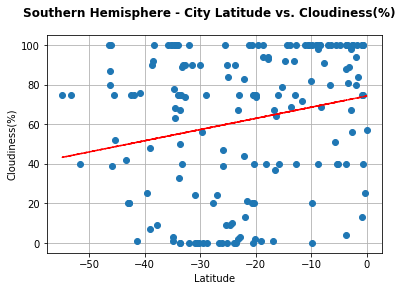

In [279]:
linear_regression(southern_hem["latitude"],southern_hem["cloudiness"],
                 "Southern Hemisphere - City Latitude vs. Cloudiness(%)","Latitude", "Cloudiness(%)")

In [ ]:
#There is no correlation between latitude and cloudiness in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00497911939134601


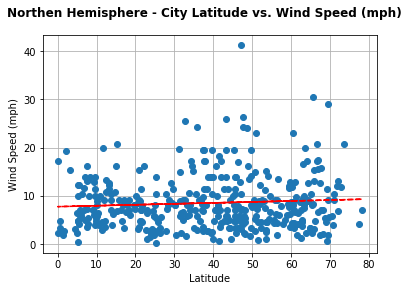

In [280]:
linear_regression(northen_hem["latitude"], northen_hem["wind speed"],
                 "Northen Hemisphere - City Latitude vs. Wind Speed (mph)","Latitude", "Wind Speed (mph)")

In [ ]:
#There is no correlation between latitude and wind speed in the Northern Hemisphere.
#Most winds are up to 10 mph.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.16440366361131004


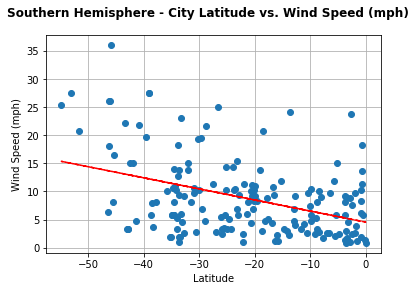

In [281]:
linear_regression(southern_hem["latitude"],southern_hem["wind speed"],
                 "Southern Hemisphere - City Latitude vs. Wind Speed (mph)","Latitude", "Wind Speed (mph)")

In [ ]:
#There is weak negative correlation between latitude and wind speed in the Southern Hemisphere.